Глава 5. Первое знакомство с pandas

In [1]:
import pandas as pd
import numpy as np

# 5.1 Введение в структуры данных pandas

## Объект Series

- одномерный, похожий на массив объект, содержащий последовательность данных и ассоциированный с ним массив меток, который называется $индексом$
- упорядоченный словарь фиксированной длины, его можно передавать многим функциям, ожидающим получить словарь

In [2]:
# Простейший объект Series состоит только из массива данных
# По умолчанию создается индекс от 0 до N-1
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
# Значения массива в виде двумерного массива
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
# Значения индексов
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
# Создание объекта Series с определенным индексом
obj2 = pd.Series([4, 7, -5, 3], index = ['d', 'b', 'a', 'c'])

print(obj2)
print('\n', obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64

 Index(['d', 'b', 'a', 'c'], dtype='object')


In [6]:
# Выборки значений
print(obj2['a'])

obj2['d'] = 6

print(obj2[['c', 'a', 'd']])

-5
c    3
a   -5
d    6
dtype: int64


In [7]:
# Фильтрация с помощью булева массива
obj2[obj2 > 0]

# Математические операции
print(obj2 * 2)

print('\n', np.exp(obj2))

d    12
b    14
a   -10
c     6
dtype: int64

 d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [8]:
# объекта Series можно передавать многим функциям, ожидающим получить словарь
print('b' in obj2)
print('e' in obj2)

True
False


In [9]:
# из словаря Python с данными можно создать объект Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [10]:
# Если передать индексы, то в получившемся объекте Series
# ключи будут храниться в индексе по порядку
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [11]:
# Работа с отсутствующими данными
print(pd.isnull(obj4))
# равносильно этому
print('\n', obj4.isnull())

print('\n', pd.notnull(obj4))

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

 California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

 California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool


In [12]:
# Сложение двух объектов Series
print(obj3)
print('\n', obj4)
print('\n', obj3 + obj4)

# ПОЧЕМУ Utah  ==  NaN ?????
# Наверное, потому что чтобы было не NaN, надо чтобы у обоих списков было не NaN

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

 California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

 California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [13]:
# И у самого объекта Series, и у его индекса, имеется атрибут name, 
# тесно связанный с другими частями функционала pandas
obj4.name = 'population'
obj4.index.name = 'state'

print(obj4)
print('\n', obj4.index)

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

 Index(['California', 'Ohio', 'Oregon', 'Texas'], dtype='object', name='state')


In [14]:
# индекс можно изменять на месте с помощью присваивания
print(obj)
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
print('\n', obj)

0    4
1    7
2   -5
3    3
dtype: int64

 Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64


## Объект DataFrame

In [15]:
# Создание DataFrame
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [16]:
# Вывод первых 5 строк
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [17]:
# Вывод столбцов в определенном порядке
pd.DataFrame(data, columns = ['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [18]:
# Если запросить столбец, которого нет в data, то он будет заполнен значениями NaN
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                             'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [19]:
# Столбец можно извлечь как объект Series
frame2['state']

# или так frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [20]:
# Строку можно извлечь с помощью атрибута loc
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [21]:
# Столбцы можно изменить присваиванием
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [22]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [23]:
frame2['debt'] = [1,2,3,4,5,6]
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,1
two,2001,Ohio,1.7,2
three,2002,Ohio,3.6,3
four,2001,Nevada,2.4,4
five,2002,Nevada,2.9,5
six,2003,Nevada,3.2,6


In [24]:
# Когда столбцу присваивается список или массив, длина значения должна совпадать с длиной DataFrame
# Если же присваивается объект Series, то пропуски будут заполнены NaN
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [25]:
# Проверка присутствия значения в столбце
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [26]:
# Удаление столбца
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [27]:
# Словарь словарей используется для задания индексов столбцов и строк
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [28]:
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [29]:
# В DataFrame можно поменять местами столбцы со строками
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [30]:
pd.DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [31]:
# Series
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [32]:
# Можно подписать название осей
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [33]:
# Значения массива в виде двумерного массива
print(frame3.values)
print()
print(frame2.values)

[[2.4 1.7]
 [2.9 3.6]
 [nan 1.5]]

[[2000 'Ohio' 1.5 nan]
 [2001 'Ohio' 1.7 -1.2]
 [2002 'Ohio' 3.6 nan]
 [2001 'Nevada' 2.4 -1.5]
 [2002 'Nevada' 2.9 -1.7]
 [2003 'Nevada' 3.2 nan]]


## Индексные объекты

- Индексы могут повторяться

In [34]:
# проверка наличия определенного индекса
print('Ohio' in frame3.columns)
print()
print(2003 in frame3.index)

True

False


- Методы и свойства объекта Index на стр. 156, Таблица 5.2.

# 5.2. Базовая функциональность

## Переиндексация

- Метод reindex очень важен, он позволяет реорганизовать данные в соответствии с новым индексом
- Если каких-то значений не было, то они заполняются NaN
- С помощью reindex можно сортировать словари

In [35]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [36]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [37]:
# Для упорядоченных данных можно воспользоваться method = 'ffill'
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print(obj3)
print()
print(obj3.reindex(range(6), method='ffill'))

0      blue
2    purple
4    yellow
dtype: object

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


- С помощью reindex можно сортировать словари

In [38]:
# Алгоритм сортировки словаря по индексу
a = {'Xan' : [1,2,3],'Andrew' : [6,7,8], 'John': [11,13,55]}
print(a)
print()

Ser = pd.Series(a)
print(Ser)
print()

Ser = Ser.reindex(sorted(Ser.index))
print(Ser)
print()

a = dict(Ser)
print(a)

{'Xan': [1, 2, 3], 'Andrew': [6, 7, 8], 'John': [11, 13, 55]}

Xan          [1, 2, 3]
Andrew       [6, 7, 8]
John      [11, 13, 55]
dtype: object

Andrew       [6, 7, 8]
John      [11, 13, 55]
Xan          [1, 2, 3]
dtype: object

{'Andrew': [6, 7, 8], 'John': [11, 13, 55], 'Xan': [1, 2, 3]}


In [39]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [40]:
# Реиндексация строк
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [41]:
# Реиндексация столбцов
states = ['Texas', 'Utah', 'California']
frame = frame.reindex(columns=states)
frame

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [42]:
# Вывод среза в середине таблицы
frame.loc[['c', 'd'], ['Utah']]

,Utah
c,NaN
d,NaN


## Удаление элементов из оси

- Для Series

In [43]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [44]:
new_obj = obj.drop(['d', 'c'])
new_obj

a    0.0
b    1.0
e    4.0
dtype: float64

- Для DataFrame

In [45]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [46]:
# Удаление строки
data.drop('Ohio', axis=0)

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [47]:
# Удаление столбца
data.drop('two', axis=1)
# или axis='columns'

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


## Доступ по индексу, выборка и фильтрация

- Series

In [48]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [49]:
obj['b']

1.0

In [50]:
obj[2]

2.0

In [51]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [52]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [53]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

- Вырезание включает последнюю метку

In [54]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [55]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

- DataFrame

In [56]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [57]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [58]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [59]:
data[data['three'] > 5][['one']]

,one
Colorado,4
Utah,8
New York,12


In [60]:
data < 5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [61]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Выборка с помощью loc и iloc

- Отличие loc от iloc в том, что loc может использовать в качестве индексов строки, а iloc использует в качестве индексов только числа

In [62]:
data.loc[['Colorado'], ['two', 'three']]

,two,three
Colorado,5,6


In [63]:
data.iloc[[2], [3, 0, 1]]

,four,one,two
Utah,11,8,9


In [64]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [65]:
data.loc[:'Utah', ['two']]

,two
Ohio,0
Colorado,5
Utah,9


In [66]:
data.iloc[:, :3]

,one,two,three
Ohio,0,0,0
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


In [67]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


- Доступ по индексу ix нежелателен, он устарел

In [68]:
# Выбор одного скалярного значения
data.at['Utah', 'two']

9

In [69]:
# Выбор одного скалярного значения по целочисленным позициям
data.iat[1, 1]

5

## Целочисленные индексы

In [70]:
ser = pd.Series(np.arange(3.))
print(ser.loc[:1])
print('\n', ser.iloc[:1])

0    0.0
1    1.0
dtype: float64

 0    0.0
dtype: float64


## Арифметические операции и выравнивание данных

- Series

In [71]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],
               index=['a', 'c', 'e', 'f', 'g'])
print(s1)
print()
print(s2)

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64


In [72]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

- DataFrame

In [73]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [74]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [75]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [76]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


- т.к. столбцы 'c' и 'e' не встречаются в обоих объектах DataFrame сразу, то в результирующем объекте они помечены как $отсутствующие$ ($NaN$)

### Восполнение значений в арифметических методах

- Иногда желательно поместить специальное значение в позицию операнда, которым в другом операнде соответствует отсутствующая позиция:

In [77]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))

In [78]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [79]:
df2 

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [80]:
df2.loc[1, 'b'] = np.nan

In [81]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [82]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [83]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


- add - сложение (+)
- sub - вычитание (-)
- div - деление (/)
- floordiv - деление с отсечением (//)
- mul - умножение (*)
- pow - возведение в степень (**)

- Так же можно указывать восполняемое значение при переиндексации

In [84]:
df1.reindex(columns=df2.columns, fill_value= 'kekes')

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,kekes
1,4.0,5.0,6.0,7.0,kekes
2,8.0,9.0,10.0,11.0,kekes


In [85]:
df1.reindex(columns=df2.columns)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,NaN
1,4.0,5.0,6.0,7.0,NaN
2,8.0,9.0,10.0,11.0,NaN


### Операции между DataFrame и Series

In [86]:
# Students['назв столбца'].value_counts()

In [87]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [88]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [89]:
# При вычитании из таблицы строки, 
# из каждой строки таблицы вычитается эта строка
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [90]:
# Если индекс не найден либо в столбцах DataFrame, либо в индексе Series,
# то объекты переиндексируются для образования объединения:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2

b    0
e    1
f    2
dtype: int64

In [91]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [92]:
# Для сопоставления строк:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [93]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


In [94]:
frame = frame + 1
frame

,b,d,e
Utah,1.0,2.0,3.0
Ohio,4.0,5.0,6.0
Texas,7.0,8.0,9.0
Oregon,10.0,11.0,12.0


In [95]:
frame.sub(series3, axis='index')

,b,d,e
Utah,0.0,1.0,2.0
Ohio,0.0,1.0,2.0
Texas,0.0,1.0,2.0
Oregon,0.0,1.0,2.0


## Применение функций и отображение

- Универсальные функции NumPy (поэлементные методы массивов) отлично работают и с объектами pandas

In [96]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.043838,0.027469,0.907476
Ohio,0.344542,1.584715,1.068366
Texas,1.519073,-0.724228,0.608343
Oregon,0.300497,0.633368,0.237916


In [97]:
np.abs(frame)

,b,d,e
Utah,0.043838,0.027469,0.907476
Ohio,0.344542,1.584715,1.068366
Texas,1.519073,0.724228,0.608343
Oregon,0.300497,0.633368,0.237916


In [98]:
# Еще одна часто встречающаяся операция – применение функции,
# определенной для одномерных массивов, к каждому столбцу или строке.
# Именно это и делает метод apply объекта DataFrame:
f = lambda x: x.max() - x.min()
frame.apply(f)

b    1.562910
d    2.308944
e    0.830450
dtype: float64

In [99]:
# Если передать методу apply аргумент axis='columns', 
# то функция будет вызываться по одному разу для каждой строки:
frame.apply(f, axis='columns')

Utah      0.951314
Ohio      1.240174
Texas     2.243301
Oregon    0.395452
dtype: float64

In [100]:
# Функция, передаваемая методу apply, не обязана возвращать скалярное
# значение, она может вернуть и объект Series, содержащий несколько значений:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min', 'max'])
frame.apply(f)

,b,d,e
min,-0.043838,-0.724228,0.237916
max,1.519073,1.584715,1.068366


In [101]:
# Можно использовать и поэлементные функции Python.
# Допустим, требуется вычислить форматированную строку для каждого 
# элемента frame с плавающей точкой. Это позволяет сделать метод applymap:
format = lambda x: '%.2f' % x
frame.applymap(format)

,b,d,e
Utah,-0.04,0.03,0.91
Ohio,0.34,1.58,1.07
Texas,1.52,-0.72,0.61
Oregon,0.30,0.63,0.24


In [102]:
# Этот метод называется applymap, потому что в классе Series есть
# метод map для применения функции к каждому элементу:
frame['e'].map(format)

Utah      0.91
Ohio      1.07
Texas     0.61
Oregon    0.24
Name: e, dtype: object

## Сортировка и ранжирование

- Series

In [103]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [104]:
# Для лексикографической сортировки по индексу служит метод sort_index,
# который возвращает новый отсортированный объект:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

- DataFrame

In [105]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [106]:
# В случае DataFrame можно сортировать по индексу, ассоциированному с любой осью:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [107]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [108]:
# По умолчанию данные сортируются в порядке возрастания,
# но можно отсортировать их и в порядке убывания:
frame.sort_index(axis=1, ascending=False)

# Перевод ascending: по возрастанию

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


- Series

In [109]:
# Для сортировки Series по значениям служит метод sort_values:
obj = pd.Series([4, 7, -3, 2])

In [110]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [111]:
# Отсутствующие значения по умолчанию оказываются в конце Series:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

- DataFrame

In [112]:
# Объект DataFrame можно сортировать по значениям в одном или нескольких столбцах.
# Для этого имена столбцов следует передать в качестве значения
# параметра by метода sort_values:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [113]:
frame.sort_values(by='b', ascending=False)

,b,a
1,7,1
0,4,0
3,2,1
2,-3,0


In [114]:
# Для сортировки по нескольким столбцам следует передать список имен:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [115]:
frame.sort_values(by=['b', 'a'])

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


- $Ранжирование$ заключается в присваивании рангов – от единицы до числа
присутствующих в массиве элементов. Для ранжирования применяется метод rank объектов Series и DataFrame; по умолчанию rank обрабатывает связанные ранги, присваивая каждой группе средний ранг:

- Series

In [116]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [117]:
# т.е. у четверок под 3 и 6 номером ранги 4 и 5, а среднее получается 4.5
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [118]:
# Одинаковые ранги можно также присваивать
# в соответствии с порядком появления в данных:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [119]:
# Можно ранжировать и в порядке убывания
# В случае связанных рангов выбрать максимальный ранг в группе:
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

Таблица 5.6. Способы обработки связанных рангов
- 'average' По умолчанию: одинаковым значениям присвоить средний ранг
- 'min' Всем элементам группы присвоить минимальный ранг
- 'max' Всем элементам группы присвоить максимальный ранг
- 'first' Присваивать ранги в порядке появления значений в наборе данных
- 'dense' Как method='min', но при переходе к следующей группе элементов с одинаковым рангом
ранг всегда увеличивается на 1, а не на количество элементов в группе

- DataFrame

In [120]:
# DataFrame умеет вычислять ранги как по строкам, так и по столбцам:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [121]:
# Вычисляем ранги в строках
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


In [122]:
# Вычисляем ранги в столбцах
frame.rank()

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


## Индексы по осям с повторяющимися значениями

- Series

In [123]:
# Рассмотрим небольшой объект Series с повторяющимися значениями в индексе:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [124]:
# О том, являются значения уникальными или нет, можно узнать, опросив
# свойство is_unique:
obj.index.is_unique

False

In [125]:
# При доступе по индексу, встречающемуся несколько раз,
# возвращается объект Series:
obj['a']

a    0
a    1
dtype: int64

In [126]:
# Если же индекс одиночный, то скалярное значение
obj['c']

4

- DataFrame

In [127]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.669365,0.529641,0.497985
a,0.440823,-0.320163,-0.507870
b,-0.332452,-2.085947,-1.911601
b,1.802075,-1.167233,-0.229160


In [128]:
df.loc['b']

,0,1,2
b,-0.332452,-2.085947,-1.911601
b,1.802075,-1.167233,-0.229160


# 5.3. Редукция и вычисление описательных статистик

- Объекты pandas оснащены набором стандартных математических и статистических методов. Большая их часть попадает в категорию редукций, или
сводных статистик, – методов, которые вычисляют единственное значение
(например, сумму или среднее) для Series или объект Series – для строк либо
столбцов DataFrame.

In [129]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [130]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [131]:
df.sum(axis = 1)
# или df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [132]:
# До этого вместо NaN подставлялись нули
# Чтобы это подавить, можно использовать параметр skipna:
df.mean(axis='columns', skipna=False) # считаем среднее

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [133]:
# Некоторые методы, например idxmin и idxmax, возвращают 
# косвенные статистики, скажем, индекс, при котором достигается 
# минимум или максимум
df.idxmax()

one    b
two    d
dtype: object

In [134]:
# Есть также аккумулирующие методы (складывание поочередно каждой строки):
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [135]:
# Наконец, существуют методы, не относящиеся ни к редуцирующим, ни к аккумулирующим.
# Примером может служить метод describe, который возвращает несколько
# сводных статистик за одно обращение:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [136]:
# В случае нечисловых данных describe возвращает другие сводные статистики:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [137]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

Таблица 5.8. Описательные и сводные статистики

- count Количество значений, исключая отсутствующие
- describe Вычисляет набор сводных статистик для Series или для каждого столбца DataFrame
- min, max Вычисляет минимальное или максимальное значение
- argmin, argmax Вычисляет позицию в индексе (целые числа), при котором достигается минимальное или максимальное значение соответственно
- idxmin, idxmax Вычисляет значение индекса, при котором достигается- минимальное или максимальное значение соответственно
- quantile Вычисляет выборочный квантиль в диапазоне от 0 до 1
- sum Сумма значений
- mean Среднее значение
- median Медиана (50%-ный квантиль)
- mad Среднее абсолютное отклонение от среднего
- var Выборочная дисперсия
- std Выборочное стандартное отклонение
- skew Асимметрия (третий момент)
- kurt Куртозис (четвертый момент)
- cumsum Нарастающая сумма
- cummin, cummax Нарастающий минимум или максимум соответственно
- cumprod Нарастающее произведение
- diff Первая арифметическая разность (полезно для временных рядов)
- pct_change Вычисляет процентное изменение

## Корреляция и ковариация

- $Коэффициент$ $корреляции$ характеризует степень линейной зависимости между двумя $случайными$ величинами

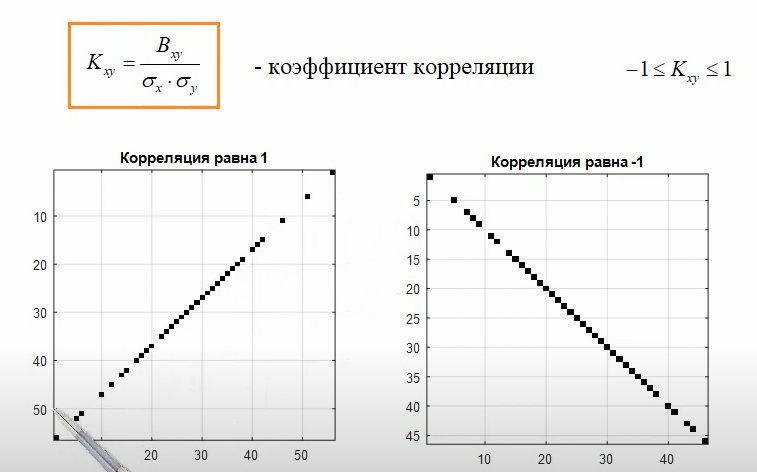

In [138]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close']
for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
for ticker, data in all_data.items()})

In [139]:
price.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-03-30,177.770004,132.130005,313.859985,2852.889893
2022-03-31,174.610001,130.020004,308.309998,2792.989990
2022-04-01,174.309998,130.149994,309.420013,2814.000000
2022-04-04,178.440002,130.270004,314.970001,2872.850098
2022-04-05,174.864502,128.940002,310.980011,2830.625000


In [140]:
# вычислим процентные изменения цен:
returns = price.pct_change()

In [141]:
# Последние 5 значений
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-03-30,-0.006650,0.001440,-0.004914,-0.004227
2022-03-31,-0.017776,-0.015969,-0.017683,-0.020996
2022-04-01,-0.001718,0.001000,0.003600,0.007522
2022-04-04,0.023693,0.000922,0.017937,0.020913
2022-04-05,-0.020038,-0.010210,-0.012668,-0.014698


In [142]:
# Метод corr объекта Series вычисляет корреляцию перекрывающихся,
# отличных от NA, выровненных по индексу значений в двух объектах Series.
# Соответственно, метод cov вычисляет ковариацию:
returns['MSFT'].corr(returns['IBM'])
# или returns.MSFT.corr(returns.IBM)

0.48173911170689154

In [143]:
returns['MSFT'].cov(returns['IBM'])

0.00014424546040231066

In [144]:
# Для DataFrame:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.429599,0.746416,0.667765
IBM,0.429599,1.000000,0.481739,0.455912
MSFT,0.746416,0.481739,1.000000,0.786551
GOOG,0.667765,0.455912,0.786551,1.000000


In [145]:
 returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000382,0.000141,0.000261,0.000230
IBM,0.000141,0.000281,0.000144,0.000135
MSFT,0.000261,0.000144,0.000319,0.000248
GOOG,0.000230,0.000135,0.000248,0.000311


In [146]:
# С помощью метода corrwith объекта DataFrame можно вычислить попарные
# корреляции между столбцами или строками DataFrame и другим объектом
# Series или DataFrame. Если передать ему объект Series, то будет возвращен
# Series, содержащий значения корреляции, вычисленные для каждого столбца:
returns.corrwith(returns.IBM)

AAPL    0.429599
IBM     1.000000
MSFT    0.481739
GOOG    0.455912
dtype: float64

In [147]:
# Если передать объект DataFrame, то будут вычислены корреляции столбцов
# с соответственными именами. Ниже я вычисляю корреляции
# процентных изменений с объемом сделок:
returns.corrwith(volume)
# Если передать axis='columns', то будут вычислены корреляции строк. 

AAPL   -0.082446
IBM    -0.128858
MSFT   -0.068150
GOOG   -0.091474
dtype: float64

## Уникальные значения, счетчики значений и членство

In [148]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [149]:
# Метод unique возвращает массив уникальных значений в Series:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [150]:
# Метод value_counts вычисляет объект Series, 
# содержащий частоты встречаемости значений:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [151]:
# Функция value_counts может быть также вызвана как метод pandas верхнего уровня.
# В таком случае она применима к любому массиву или последовательности:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

In [152]:
# Метод isin вычисляет булев вектор членства в множестве и может быть полезен для фильтрации набора данных относительно подмножества значений
# в объекте Series или столбце DataFrame:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [153]:
mask = obj.isin(['b', 'c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [154]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [155]:
# С isin тесно связан метод Index.get_indexer, который возвращает массив
# индексов, описывающий сопоставление между массивом потенциально
# повторяющихся значений и массивом, содержащим только различные значения:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
unique_vals = pd.Series(['c', 'b', 'a'])
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)